In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
# dimension of the dataset
df.shape

(180, 9)

In [43]:
# data type of each column
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [44]:
# statistical properties of the feature
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [49]:
# check fo missing values
df.isna().mean()

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

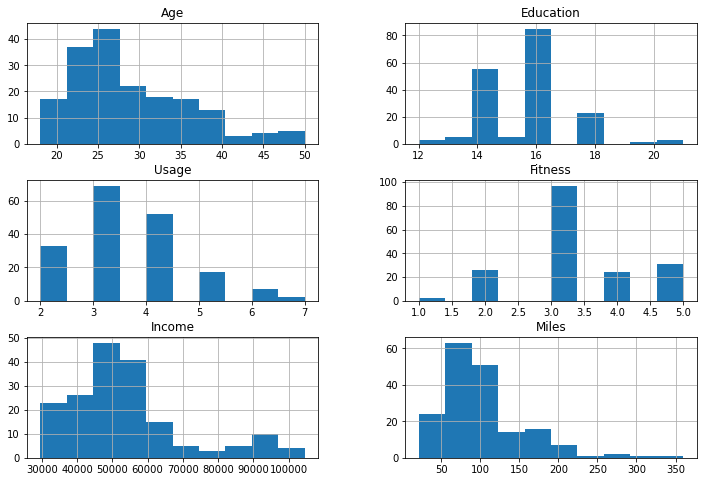

In [48]:
# Analysis of spread and distribution of numerical features
df.hist(figsize=(12,8));

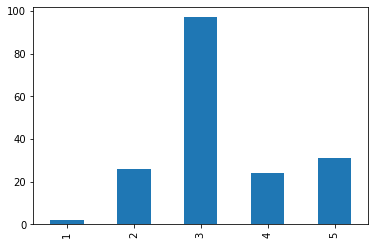

In [69]:
df['Fitness'].value_counts().sort_index().plot(kind='bar');

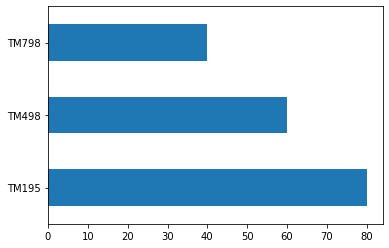

In [6]:
# distribution of the products
df['Product'].value_counts().plot(kind='barh');

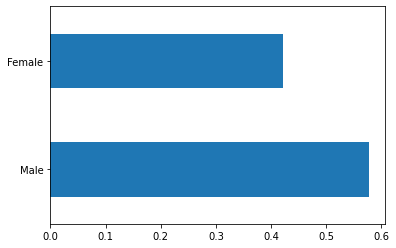

In [8]:
# bivariate - distribution of gender
df['Gender'].value_counts(normalize=True).plot(kind='barh');

<AxesSubplot:xlabel='Fitness', ylabel='Usage'>

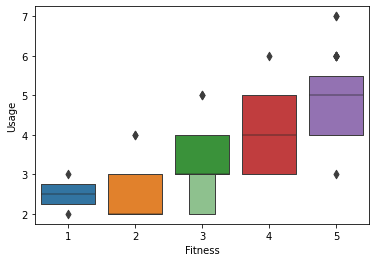

In [16]:
# bi-variate - usage vs fitness
sns.boxenplot(x='Fitness', y='Usage', data=df)

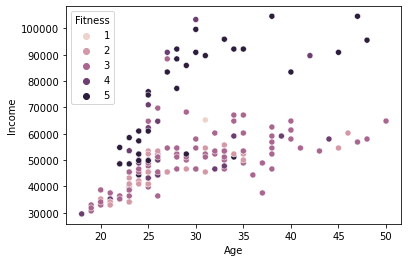

In [24]:
# multi-variate - Income vs age and fitness level
sns.scatterplot(x='Age', y='Income', hue='Fitness', data=df);

In [52]:
# convert categorical values to dummy, we also drop the first category as n-1 needed to represent a variable with n categories
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,Age,Education,Usage,Fitness,Income,Miles,Product_TM498,Product_TM798,Gender_Male,MaritalStatus_Single
0,18,14,3,4,29562,112,0,0,1,1
1,19,15,2,3,31836,75,0,0,1,1
2,19,14,4,3,30699,66,0,0,0,0
3,19,12,3,3,32973,85,0,0,1,1
4,20,13,4,2,35247,47,0,0,1,0


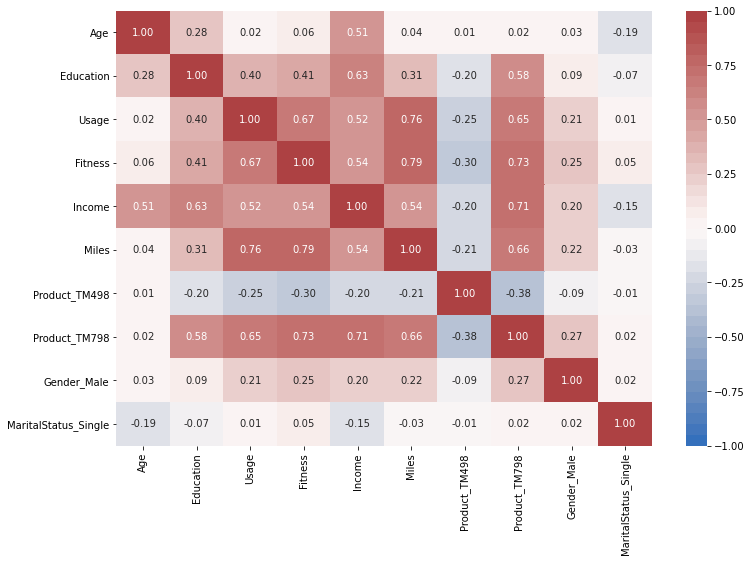

In [51]:
# correlation between variables
plt.figure(figsize=(12,8))
sns.heatmap(df_dummy.corr(), vmin=-1, vmax=1, cmap=sns.color_palette("vlag", 40), annot=True, fmt='.2f');

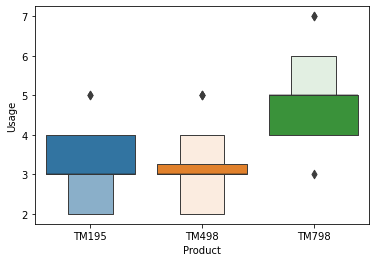

In [50]:
# boxplot of usage per each product
sns.boxenplot(x='Product', y='Usage', data=df);

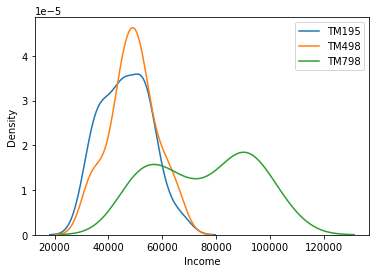

In [57]:
for name, rows in df.groupby('Product'):
    sns.kdeplot(rows['Income'], label=name)
plt.legend();

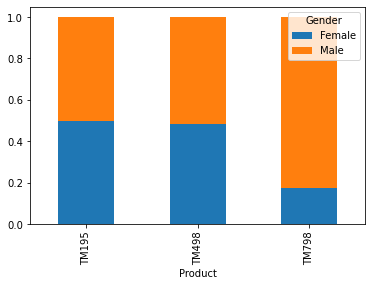

In [65]:
df.groupby('Product')['Gender'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True);

1 - Correlation chart shows a lot of information about the relationship between features

2 - There is a strong relationship between fitness and usage. People with high level self-related fitness want to use treadmill more often

3 - there is no correlation between age or marital status and treadmil usage. Therefore, both genders tend to use treadmill same amount

4 - We found positive relationship between income and self-fitness. It seems more income leads to more tendancy to use treadmil.

5 - Education aslo has positive relationship with treadmil usage. More educated poeple care more about their health and fitness

6 - Regarding products, TM798 seems to be more popular among people with high self-rated fitness. This could be because of this product being more advanced and having more features

7 - TM195/TM498 products are more popular among low income people (all less than 80k). People with income more than 80k buy TM798 product

8 - TM195/TM498 are equally popular among male/female. However, TM798 is more popular among males than females